In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [27]:
df=pd.read_excel('income.xlsx',na_values="?")
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status','occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week','native_country', 'wage_class']
df.columns=col_labels

In [3]:
df.head()

age         workclass  fnlwgt  education  education_num  \
0   50  Self-emp-not-inc   83311  Bachelors             13   
1   38           Private  215646    HS-grad              9   
2   53           Private  234721       11th              7   
3   28           Private  338409  Bachelors             13   
4   37           Private  284582    Masters             14   

       marital_status         occupation   relationship   race     sex  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

   capital_gain  capital_loss  hours_per_week native_country wage_class  
0             0             0              13  United-States      <=50K  
1             0             0              40  United-States      <=50K  
2             0             0              40  United-States      <=50K  
3             0             0              40           Cuba      <=50K  
4             0             0              40  United-States      <=50K

In [4]:
import pandas_profiling

In [5]:
df.profile_report()

In [6]:
# we find that there are few duplicates.
# 'capital loss' and 'capital gain' have more than 95% zero values.
# 'work class', 'occupation' and 'native country' have missing values.

In [28]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe().T

count           mean            std      min       25%  \
age             32536.0      38.585536      13.638193     17.0      28.0   
fnlwgt          32536.0  189784.298992  105556.258211  12285.0  117831.5   
education_num   32536.0      10.081725       2.571622      1.0       9.0   
capital_gain    32536.0    1078.410069    7388.068465      0.0       0.0   
capital_loss    32536.0      87.370912     403.107737      0.0       0.0   
hours_per_week  32536.0      40.440343      12.347079      1.0      40.0   

                     50%        75%        max  
age                 37.0      48.00       90.0  
fnlwgt          178356.0  236993.25  1484705.0  
education_num       10.0      12.00       16.0  
capital_gain         0.0       0.00    99999.0  
capital_loss         0.0       0.00     4356.0  
hours_per_week      40.0      45.00       99.0

In [9]:
# visualization.

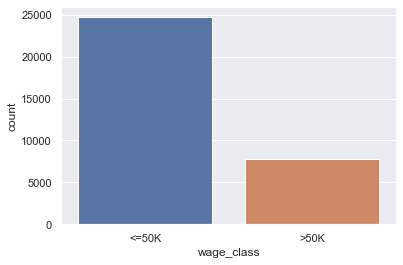

In [10]:
sns.countplot(df.wage_class)

In [11]:
# we found that more almost 25000 people get <=50k salary and almost 8000 people get >=50k.
# so the this is imbalanced data set.

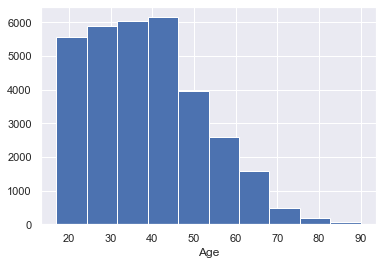

In [12]:
plt.hist(df.age,bins=10)
plt.xlabel('Age')
plt.show()

In [13]:
# majority of people are below 50 years.
# age is right skewed and not normally distributed

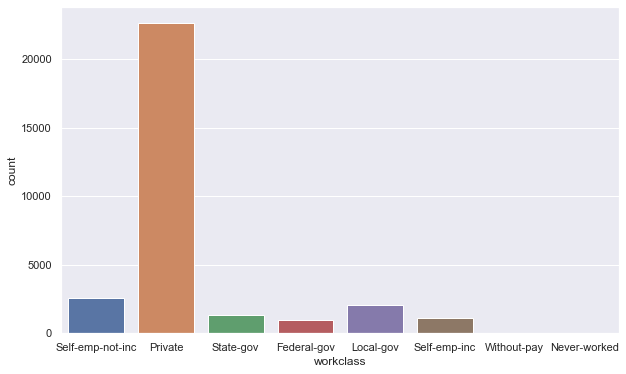

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(df.workclass)

In [15]:
df.groupby('workclass').size()

workclass
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22673
Self-emp-inc         1116
Self-emp-not-inc     2540
State-gov            1297
Without-pay            14
dtype: int64

In [16]:
labels=['Federal-gov','Local-gov','Never-worked','Private','Self-emp-inc','Self-emp-not-inc','State-gov','Without-pay']

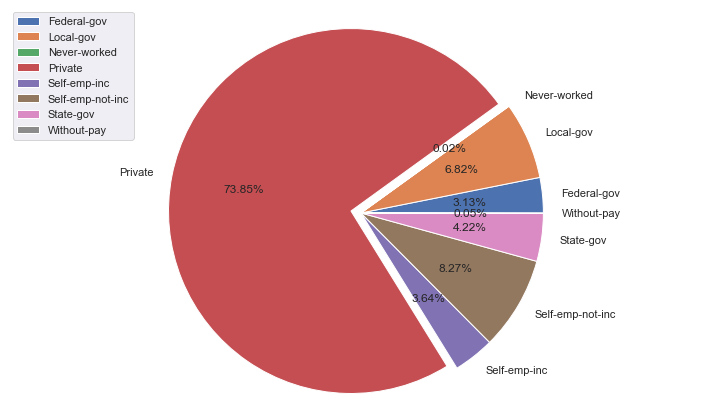

In [17]:
plt.figure(figsize=(10,6))
plt.pie(df.groupby('workclass').size(),labels=labels,radius=0.9,autopct='%0.2f%%',shadow=False,explode=(0,0,0,0.05,0,0,0,0))
plt.tight_layout()
plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

In [18]:
# almost 73% people belong from privet sectors.

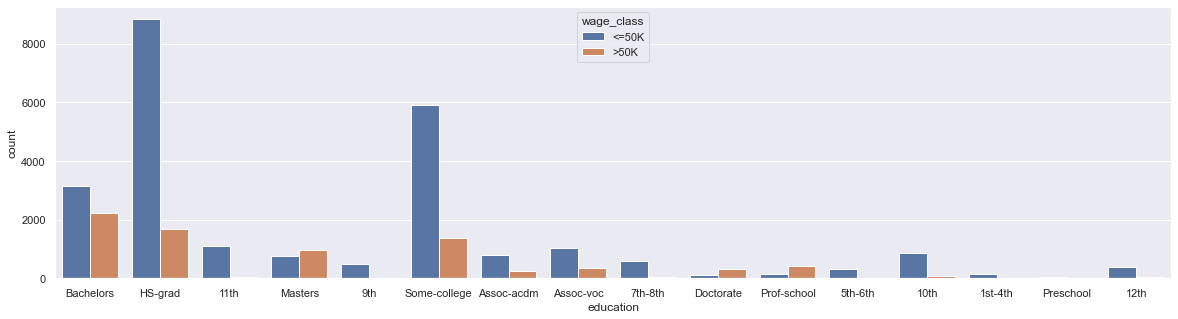

In [19]:
plt.figure(figsize=(20,5))
sns.countplot(df.education,hue=df.wage_class)

In [20]:
# important intutions have found.
# maximum people belongs from HS-grad and Some-college and majorly they got <=50k salary. but from Bechelor, Masters, Doctorate, and Prof-school there majorly people gets >=50k salary.
# it says that as per increasing education level, the chances of getting >=50k salary is high.

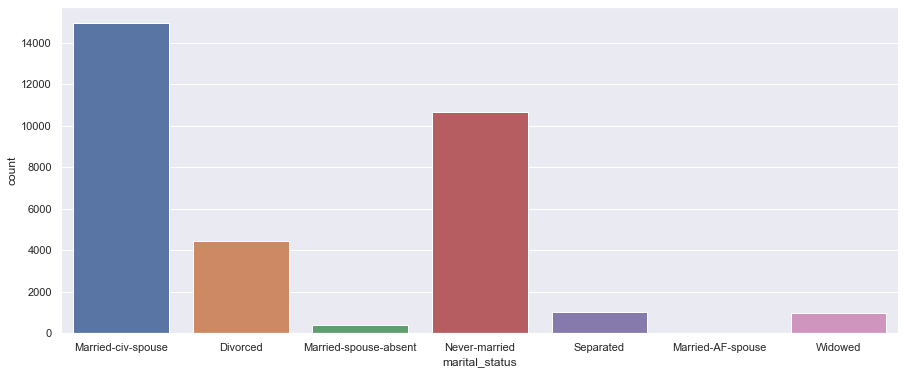

In [21]:
plt.figure(figsize=(15,6))
sns.countplot(df.marital_status)

In [22]:
# almost 40% belongs from Married-civ-spouse

In [23]:
df.occupation.unique()

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

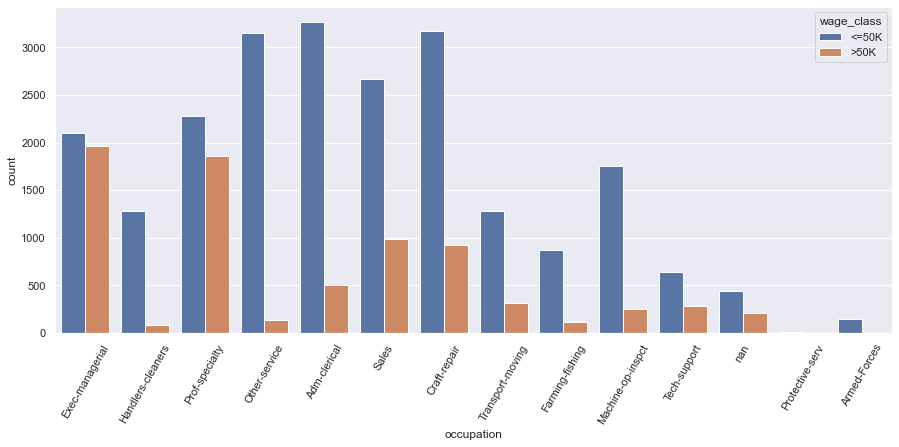

In [24]:
plt.figure(figsize=(15,6))
a=sns.countplot(df.occupation,hue=df.wage_class)
a.set_xticklabels(df.occupation.unique(),rotation=60)
plt.show()

In [25]:
# we have found that majorly 'exec-mangeral' and 'prof speciality' have >=50k salary in general.

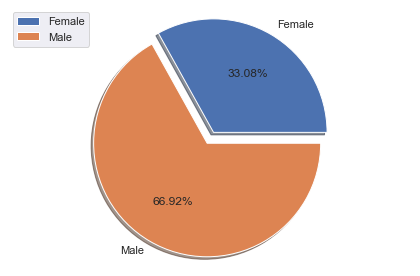

In [26]:
plt.pie(df.groupby('sex').size(),labels=['Female','Male'],radius=0.9,autopct='%0.2f%%',shadow=True,explode=(0.1,0))
plt.tight_layout()
plt.axis('equal')
plt.legend(loc='upper left')
plt.show()

In [27]:
# majority of gender is male with 66% of total.

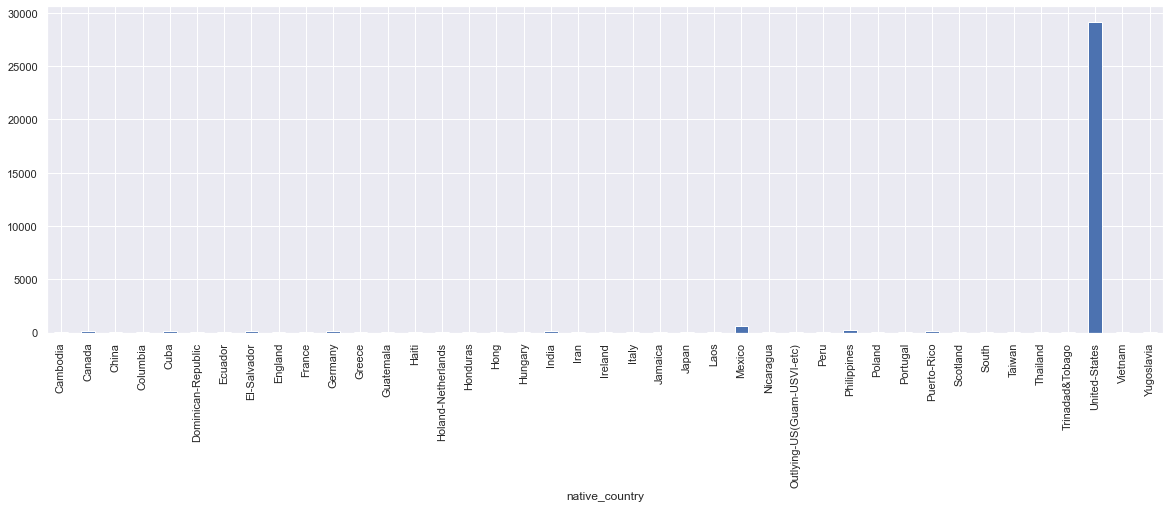

In [28]:
plt.figure(figsize=(20,6))
df.groupby('native_country').size().plot(kind='bar')

In [29]:
# almost 90% people belongs from US

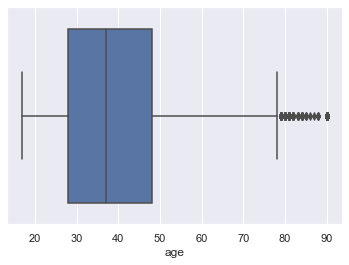

In [30]:
sns.boxplot(df.age)

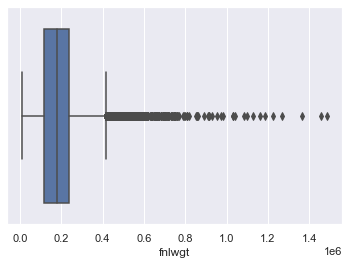

In [31]:
sns.boxplot(df.fnlwgt)

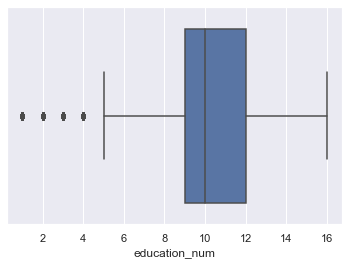

In [32]:
sns.boxplot(df.education_num)

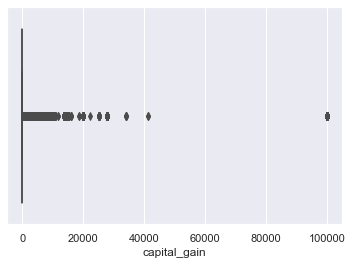

In [33]:
sns.boxplot(df.capital_gain)

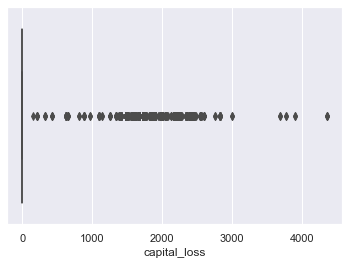

In [34]:
sns.boxplot(df.capital_loss)

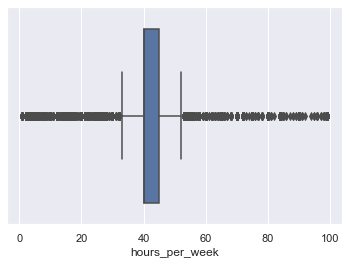

In [35]:
sns.boxplot(df.hours_per_week)

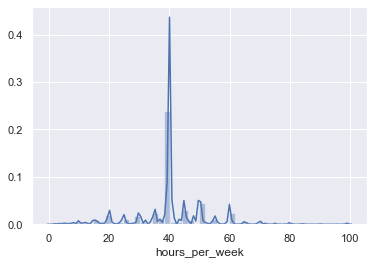

In [36]:
sns.distplot(df['hours_per_week'])

In [37]:
df._get_numeric_data().columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [29]:
numeric_col=['age', 'fnlwgt', 'education_num', 'hours_per_week']

In [30]:
# outlier analysis
for i in numeric_col:
    print(i)
    Q1,Q3=np.quantile(df.loc[:,i],[0.25,0.75])
    IQR=Q3-Q1
    min=Q1-1.5*IQR
    max=Q3+1.5*IQR
    print(min)
    print(max)
    df=df.drop(df[df.loc[:,i]<min].index)
    df=df.drop(df[df.loc[:,i]>max].index)

age
-2.0
78.0
fnlwgt
-61302.25
416441.75
education_num
4.5
16.5
hours_per_week
32.5
52.5


In [5]:
df

age         workclass  fnlwgt     education  education_num  \
1       38           Private  215646       HS-grad              9   
2       53           Private  234721          11th              7   
3       28           Private  338409     Bachelors             13   
4       37           Private  284582       Masters             14   
6       52  Self-emp-not-inc  209642       HS-grad              9   
...    ...               ...     ...           ...            ...   
32554   22           Private  310152  Some-college             10   
32555   27           Private  257302    Assoc-acdm             12   
32556   40           Private  154374       HS-grad              9   
32557   58           Private  151910       HS-grad              9   
32559   52      Self-emp-inc  287927       HS-grad              9   

           marital_status         occupation   relationship   race     sex  \
1                Divorced  Handlers-cleaners  Not-in-family  White    Male   
2      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4      Married-civ-spouse    Exec-managerial           Wife  White  Female   
6      Married-civ-spouse    Exec-managerial        Husband  White    Male   
...                   ...                ...            ...    ...     ...   
32554       Never-married    Protective-serv  Not-in-family  White    Male   
32555  Married-civ-spouse       Tech-support           Wife  White  Female   
32556  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
32557             Widowed       Adm-clerical      Unmarried  White  Female   
32559  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital_gain  capital_loss  hours_per_week native_country wage_class  
1                 0             0              40  United-States      <=50K  
2                 0             0              40  United-States      <=50K  
3                 0             0              40           Cuba      <=50K  
4                 0             0              40  United-States      <=50K  
6                 0             0              45  United-States       >50K  
...             ...           ...             ...            ...        ...  
32554             0             0              40  United-States      <=50K  
32555             0             0              38  United-States      <=50K  
32556             0             0              40  United-States       >50K  
32557             0             0              40  United-States      <=50K  
32559         15024             0              40  United-States       >50K  

[21957 rows x 15 columns]

In [31]:
# missing value treatment
df.workclass.fillna(df.workclass.mode()[0],inplace=True)
df.occupation.fillna(df.occupation.mode()[0],inplace=True)
df.native_country.fillna(df.native_country.mode()[0],inplace=True)

In [42]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [43]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [44]:
# chi square test
from scipy.stats import chi2_contingency
cat_col=['workclass', 'education','marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
for i in cat_col:
    print('P value for {}:'.format(i))
    _,p,_,_=chi2_contingency(pd.crosstab(df.wage_class,df[i]))
    print(p)
    print('\n')

P value for workclass:
3.068414558137735e-98


P value for education:
0.0


P value for marital_status:
0.0


P value for occupation:
0.0


P value for relationship:
0.0


P value for race:
1.0689386282153673e-54


P value for sex:
9.485294579987703e-224


P value for native_country:
2.9937281300277143e-19




In [45]:
# we have not evidance to accept null hypothesis for any categorical attributes.

In [46]:
df.corr()

age    fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000000 -0.064995       0.072918      0.087463      0.059755   
fnlwgt         -0.064995  1.000000      -0.021993     -0.001293     -0.001676   
education_num   0.072918 -0.021993       1.000000      0.110139      0.081851   
capital_gain    0.087463 -0.001293       0.110139      1.000000     -0.033074   
capital_loss    0.059755 -0.001676       0.081851     -0.033074      1.000000   
hours_per_week  0.053372 -0.009958       0.146976      0.059007      0.038701   

                hours_per_week  
age                   0.053372  
fnlwgt               -0.009958  
education_num         0.146976  
capital_gain          0.059007  
capital_loss          0.038701  
hours_per_week        1.000000

In [47]:
# no multi collinearity is there.

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [32]:
sc=StandardScaler()
df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss','hours_per_week']]=sc.fit_transform(df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss','hours_per_week']])    

In [34]:
x=df.drop('wage_class',axis=1)
y=df['wage_class']

In [50]:
x.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [35]:
columntransformer=ColumnTransformer([('enocder',OneHotEncoder(),[1])],remainder='passthrough')
x=columntransformer.fit_transform(x)

In [36]:
pd.DataFrame(x)

0  1  2  3  4  5  6  7          8         9   ...        11  \
0      0  0  0  1  0  0  0  0 -0.0536927  0.403107  ... -0.621537   
1      0  0  0  1  0  0  0  0    1.18838  0.622681  ...  -1.52974   
2      0  0  0  1  0  0  0  0  -0.881743   1.81625  ...   1.19488   
3      0  0  0  1  0  0  0  0  -0.136498   1.19664  ...   1.64898   
4      0  0  0  0  0  1  0  0    1.10558  0.333994  ... -0.621537   
...   .. .. .. .. .. .. .. ..        ...       ...  ...       ...   
21939  0  0  0  1  0  0  0  0   -1.37857   1.49098  ... -0.167433   
21940  0  0  0  1  0  0  0  0  -0.964548  0.882614  ...  0.740774   
21941  0  0  0  1  0  0  0  0   0.111917 -0.302202  ... -0.621537   
21942  0  0  0  1  0  0  0  0    1.60241 -0.330566  ... -0.621537   
21943  0  0  0  0  1  0  0  0    1.10558   1.23514  ... -0.621537   

                       12                 13             14     15      16  \
0                Divorced  Handlers-cleaners  Not-in-family  White    Male   
1      Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
2      Married-civ-spouse     Prof-specialty           Wife  Black  Female   
3      Married-civ-spouse    Exec-managerial           Wife  White  Female   
4      Married-civ-spouse    Exec-managerial        Husband  White    Male   
...                   ...                ...            ...    ...     ...   
21939       Never-married    Protective-serv  Not-in-family  White    Male   
21940  Married-civ-spouse       Tech-support           Wife  White  Female   
21941  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
21942             Widowed       Adm-clerical      Unmarried  White  Female   
21943  Married-civ-spouse    Exec-managerial           Wife  White  Female   

             17        18        19             20  
0     -0.149235 -0.221626 -0.397047  United-States  
1     -0.149235 -0.221626 -0.397047  United-States  
2     -0.149235 -0.221626 -0.397047           Cuba  
3     -0.149235 -0.221626 -0.397047  United-States  
4     -0.149235 -0.221626  0.842997  United-States  
...         ...       ...       ...            ...  
21939 -0.149235 -0.221626 -0.397047  United-States  
21940 -0.149235 -0.221626 -0.893065  United-States  
21941 -0.149235 -0.221626 -0.397047  United-States  
21942 -0.149235 -0.221626 -0.397047  United-States  
21943   2.03856 -0.221626 -0.397047  United-States  

[21944 rows x 21 columns]

In [37]:
columntransformer=ColumnTransformer([('enocder',OneHotEncoder(),[10])],remainder='passthrough')
x=columntransformer.fit_transform(x)

In [38]:
pd.DataFrame(x)

0  1  2  3  4  5  6  7  8  9   ...        22                  23  \
0      0  0  0  0  0  0  0  0  1  0  ... -0.621537            Divorced   
1      0  1  0  0  0  0  0  0  0  0  ...  -1.52974  Married-civ-spouse   
2      0  0  0  0  0  0  1  0  0  0  ...   1.19488  Married-civ-spouse   
3      0  0  0  0  0  0  0  0  0  1  ...   1.64898  Married-civ-spouse   
4      0  0  0  0  0  0  0  0  1  0  ... -0.621537  Married-civ-spouse   
...   .. .. .. .. .. .. .. .. .. ..  ...       ...                 ...   
21939  0  0  0  0  0  0  0  0  0  0  ... -0.167433       Never-married   
21940  0  0  0  0  1  0  0  0  0  0  ...  0.740774  Married-civ-spouse   
21941  0  0  0  0  0  0  0  0  1  0  ... -0.621537  Married-civ-spouse   
21942  0  0  0  0  0  0  0  0  1  0  ... -0.621537             Widowed   
21943  0  0  0  0  0  0  0  0  1  0  ... -0.621537  Married-civ-spouse   

                      24             25     26      27        28        29  \
0      Handlers-cleaners  Not-in-family  White    Male -0.149235 -0.221626   
1      Handlers-cleaners        Husband  Black    Male -0.149235 -0.221626   
2         Prof-specialty           Wife  Black  Female -0.149235 -0.221626   
3        Exec-managerial           Wife  White  Female -0.149235 -0.221626   
4        Exec-managerial        Husband  White    Male -0.149235 -0.221626   
...                  ...            ...    ...     ...       ...       ...   
21939    Protective-serv  Not-in-family  White    Male -0.149235 -0.221626   
21940       Tech-support           Wife  White  Female -0.149235 -0.221626   
21941  Machine-op-inspct        Husband  White    Male -0.149235 -0.221626   
21942       Adm-clerical      Unmarried  White  Female -0.149235 -0.221626   
21943    Exec-managerial           Wife  White  Female   2.03856 -0.221626   

             30             31  
0     -0.397047  United-States  
1     -0.397047  United-States  
2     -0.397047           Cuba  
3     -0.397047  United-States  
4      0.842997  United-States  
...         ...            ...  
21939 -0.397047  United-States  
21940 -0.893065  United-States  
21941 -0.397047  United-States  
21942 -0.397047  United-States  
21943 -0.397047  United-States  

[21944 rows x 32 columns]

In [39]:
columntransformer=ColumnTransformer([('enocder',OneHotEncoder(),[23])],remainder='passthrough')
x=columntransformer.fit_transform(x)

In [56]:
pd.DataFrame(x)

0  1  2  3  4  5  6  7  8  9   ...      28  29                 30  \
0      1  0  0  0  0  0  0  0  0  0  ...  215646   9  Handlers-cleaners   
1      0  0  1  0  0  0  0  0  1  0  ...  234721   7  Handlers-cleaners   
2      0  0  1  0  0  0  0  0  0  0  ...  338409  13     Prof-specialty   
3      0  0  1  0  0  0  0  0  0  0  ...  284582  14    Exec-managerial   
4      0  0  1  0  0  0  0  0  0  0  ...  209642   9    Exec-managerial   
...   .. .. .. .. .. .. .. .. .. ..  ...     ...  ..                ...   
21939  0  0  0  0  1  0  0  0  0  0  ...  310152  10    Protective-serv   
21940  0  0  1  0  0  0  0  0  0  0  ...  257302  12       Tech-support   
21941  0  0  1  0  0  0  0  0  0  0  ...  154374   9  Machine-op-inspct   
21942  0  0  0  0  0  0  1  0  0  0  ...  151910   9       Adm-clerical   
21943  0  0  1  0  0  0  0  0  0  0  ...  287927   9    Exec-managerial   

                  31     32      33     34 35  36             37  
0      Not-in-family  White    Male      0  0  40  United-States  
1            Husband  Black    Male      0  0  40  United-States  
2               Wife  Black  Female      0  0  40           Cuba  
3               Wife  White  Female      0  0  40  United-States  
4            Husband  White    Male      0  0  45  United-States  
...              ...    ...     ...    ... ..  ..            ...  
21939  Not-in-family  White    Male      0  0  40  United-States  
21940           Wife  White  Female      0  0  38  United-States  
21941        Husband  White    Male      0  0  40  United-States  
21942      Unmarried  White  Female      0  0  40  United-States  
21943           Wife  White  Female  15024  0  40  United-States  

[21944 rows x 38 columns]

In [40]:
columntransformer=ColumnTransformer([('enocder',OneHotEncoder(),[30])],remainder='passthrough')
x=columntransformer.fit_transform(x)

In [58]:
pd.DataFrame(x)

0  1  2  3  4  5  6  7  8  9   ...  41      42  43             44  \
0      0  0  0  0  0  1  0  0  0  0  ...  38  215646   9  Not-in-family   
1      0  0  0  0  0  1  0  0  0  0  ...  53  234721   7        Husband   
2      0  0  0  0  0  0  0  0  0  1  ...  28  338409  13           Wife   
3      0  0  0  1  0  0  0  0  0  0  ...  37  284582  14           Wife   
4      0  0  0  1  0  0  0  0  0  0  ...  52  209642   9        Husband   
...   .. .. .. .. .. .. .. .. .. ..  ...  ..     ...  ..            ...   
21939  0  0  0  0  0  0  0  0  0  0  ...  22  310152  10  Not-in-family   
21940  0  0  0  0  0  0  0  0  0  0  ...  27  257302  12           Wife   
21941  0  0  0  0  0  0  1  0  0  0  ...  40  154374   9        Husband   
21942  1  0  0  0  0  0  0  0  0  0  ...  58  151910   9      Unmarried   
21943  0  0  0  1  0  0  0  0  0  0  ...  52  287927   9           Wife   

          45      46     47 48  49             50  
0      White    Male      0  0  40  United-States  
1      Black    Male      0  0  40  United-States  
2      Black  Female      0  0  40           Cuba  
3      White  Female      0  0  40  United-States  
4      White    Male      0  0  45  United-States  
...      ...     ...    ... ..  ..            ...  
21939  White    Male      0  0  40  United-States  
21940  White  Female      0  0  38  United-States  
21941  White    Male      0  0  40  United-States  
21942  White  Female      0  0  40  United-States  
21943  White  Female  15024  0  40  United-States  

[21944 rows x 51 columns]

In [41]:
columntransformer=ColumnTransformer([('enocder',OneHotEncoder(),[44])],remainder='passthrough')
x=columntransformer.fit_transform(x)

In [60]:
pd.DataFrame(x)

0  1  2  3  4  5  6  7  8  9   ... 46  47      48  49     50      51  \
0      0  1  0  0  0  0  0  0  0  0  ...  0  38  215646   9  White    Male   
1      1  0  0  0  0  0  0  0  0  0  ...  0  53  234721   7  Black    Male   
2      0  0  0  0  0  1  0  0  0  0  ...  0  28  338409  13  Black  Female   
3      0  0  0  0  0  1  0  0  0  1  ...  0  37  284582  14  White  Female   
4      1  0  0  0  0  0  0  0  0  1  ...  0  52  209642   9  White    Male   
...   .. .. .. .. .. .. .. .. .. ..  ... ..  ..     ...  ..    ...     ...   
21939  0  1  0  0  0  0  0  0  0  0  ...  0  22  310152  10  White    Male   
21940  0  0  0  0  0  1  0  0  0  0  ...  0  27  257302  12  White  Female   
21941  1  0  0  0  0  0  0  0  0  0  ...  0  40  154374   9  White    Male   
21942  0  0  0  0  1  0  1  0  0  0  ...  0  58  151910   9  White  Female   
21943  0  0  0  0  0  1  0  0  0  1  ...  0  52  287927   9  White  Female   

          52 53  54             55  
0          0  0  40  United-States  
1          0  0  40  United-States  
2          0  0  40           Cuba  
3          0  0  40  United-States  
4          0  0  45  United-States  
...      ... ..  ..            ...  
21939      0  0  40  United-States  
21940      0  0  38  United-States  
21941      0  0  40  United-States  
21942      0  0  40  United-States  
21943  15024  0  40  United-States  

[21944 rows x 56 columns]

In [42]:
columntransformer=ColumnTransformer([('enocder',OneHotEncoder(),[50])],remainder='passthrough')
x=columntransformer.fit_transform(x)

In [62]:
pd.DataFrame(x)

0  1  2  3  4  5  6  7  8  9   ... 50 51  52      53  54      55     56  \
0      0  0  0  0  1  0  1  0  0  0  ...  0  0  38  215646   9    Male      0   
1      0  0  1  0  0  1  0  0  0  0  ...  0  0  53  234721   7    Male      0   
2      0  0  1  0  0  0  0  0  0  0  ...  0  0  28  338409  13  Female      0   
3      0  0  0  0  1  0  0  0  0  0  ...  0  0  37  284582  14  Female      0   
4      0  0  0  0  1  1  0  0  0  0  ...  0  0  52  209642   9    Male      0   
...   .. .. .. .. .. .. .. .. .. ..  ... .. ..  ..     ...  ..     ...    ...   
21939  0  0  0  0  1  0  1  0  0  0  ...  0  0  22  310152  10    Male      0   
21940  0  0  0  0  1  0  0  0  0  0  ...  0  0  27  257302  12  Female      0   
21941  0  0  0  0  1  1  0  0  0  0  ...  0  0  40  154374   9    Male      0   
21942  0  0  0  0  1  0  0  0  0  1  ...  0  0  58  151910   9  Female      0   
21943  0  0  0  0  1  0  0  0  0  0  ...  0  0  52  287927   9  Female  15024   

      57  58             59  
0      0  40  United-States  
1      0  40  United-States  
2      0  40           Cuba  
3      0  40  United-States  
4      0  45  United-States  
...   ..  ..            ...  
21939  0  40  United-States  
21940  0  38  United-States  
21941  0  40  United-States  
21942  0  40  United-States  
21943  0  40  United-States  

[21944 rows x 60 columns]

In [43]:
columntransformer=ColumnTransformer([('enocder',OneHotEncoder(),[55])],remainder='passthrough')
x=columntransformer.fit_transform(x)

In [64]:
pd.DataFrame(x)

0  1  2  3  4  5  6  7  8  9   ... 51 52 53  54      55  56     57 58  \
0      0  1  0  0  0  0  1  0  1  0  ...  0  0  0  38  215646   9      0  0   
1      0  1  0  0  1  0  0  1  0  0  ...  0  0  0  53  234721   7      0  0   
2      1  0  0  0  1  0  0  0  0  0  ...  0  0  0  28  338409  13      0  0   
3      1  0  0  0  0  0  1  0  0  0  ...  0  0  0  37  284582  14      0  0   
4      0  1  0  0  0  0  1  1  0  0  ...  1  0  0  52  209642   9      0  0   
...   .. .. .. .. .. .. .. .. .. ..  ... .. .. ..  ..     ...  ..    ... ..   
21939  0  1  0  0  0  0  1  0  1  0  ...  0  0  0  22  310152  10      0  0   
21940  1  0  0  0  0  0  1  0  0  0  ...  0  0  0  27  257302  12      0  0   
21941  0  1  0  0  0  0  1  1  0  0  ...  0  0  0  40  154374   9      0  0   
21942  1  0  0  0  0  0  1  0  0  0  ...  0  0  0  58  151910   9      0  0   
21943  1  0  0  0  0  0  1  0  0  0  ...  0  0  0  52  287927   9  15024  0   

       59             60  
0      40  United-States  
1      40  United-States  
2      40           Cuba  
3      40  United-States  
4      45  United-States  
...    ..            ...  
21939  40  United-States  
21940  38  United-States  
21941  40  United-States  
21942  40  United-States  
21943  40  United-States  

[21944 rows x 61 columns]

In [44]:
columntransformer=ColumnTransformer([('enocder',OneHotEncoder(),[60])],remainder='passthrough')
x=columntransformer.fit_transform(x)

In [45]:
pd.DataFrame(x)

0   1   2   3   4   5   6   7   8   9    ... 91  92  93  94         95   \
0       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0 -0.0536927   
1       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0    1.18838   
2       0   0   0   0   1   0   0   0   0   0  ...   0   0   0   0  -0.881743   
3       0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0  -0.136498   
4       0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0    1.10558   
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..        ...   
21939   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   -1.37857   
21940   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0  -0.964548   
21941   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0.111917   
21942   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0    1.60241   
21943   0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0    1.10558   

            96        97        98        99        100  
0      0.403107 -0.621537 -0.149235 -0.221626 -0.397047  
1      0.622681  -1.52974 -0.149235 -0.221626 -0.397047  
2       1.81625   1.19488 -0.149235 -0.221626 -0.397047  
3       1.19664   1.64898 -0.149235 -0.221626 -0.397047  
4      0.333994 -0.621537 -0.149235 -0.221626  0.842997  
...         ...       ...       ...       ...       ...  
21939   1.49098 -0.167433 -0.149235 -0.221626 -0.397047  
21940  0.882614  0.740774 -0.149235 -0.221626 -0.893065  
21941 -0.302202 -0.621537 -0.149235 -0.221626 -0.397047  
21942 -0.330566 -0.621537 -0.149235 -0.221626 -0.397047  
21943   1.23514 -0.621537   2.03856 -0.221626 -0.397047  

[21944 rows x 101 columns]

In [46]:
y=y.map({'<=50K':0,'>50K':1})

In [49]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [68]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [69]:
from sklearn.decomposition import PCA
pca=PCA()

In [70]:
principle_components=pca.fit_transform(x)

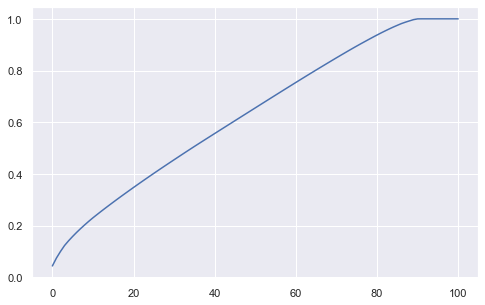

In [71]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [72]:
# chossing principle components as 87

In [73]:
pca=PCA(n_components=87)
x=pca.fit_transform(x)

In [74]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [75]:
from imblearn.combine import SMOTETomek
os=SMOTETomek()
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)

In [76]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [77]:
forest=RandomForestClassifier(n_estimators=150)
forest.fit(x_train_ns,y_train_ns)

RandomForestClassifier(n_estimators=150)

In [78]:
pred=forest.predict(x_test)

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      3943
           1       0.67      0.61      0.64      1543

    accuracy                           0.80      5486
   macro avg       0.76      0.75      0.75      5486
weighted avg       0.80      0.80      0.80      5486



In [81]:
bagging=BaggingClassifier()
param_grid={
    'base_estimator':[SVC(),DecisionTreeClassifier(),KNeighborsClassifier()],
    'n_estimators':[10,20]
}
grid_search=GridSearchCV(bagging,param_grid=param_grid,cv=5)
grid_search.fit(x_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=BaggingClassifier(),
             param_grid={'base_estimator': [SVC(), DecisionTreeClassifier(),
                                            KNeighborsClassifier()],
                         'n_estimators': [10, 20]})

In [83]:
grid_search.best_params_

{'base_estimator': DecisionTreeClassifier(), 'n_estimators': 20}

In [84]:
bagging=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=20)
bagging.fit(x_train_ns,y_train_ns)
pred=bagging.predict(x_test)

In [85]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      3919
           1       0.66      0.60      0.63      1567

    accuracy                           0.80      5486
   macro avg       0.75      0.74      0.75      5486
weighted avg       0.79      0.80      0.80      5486



In [87]:
gb=GradientBoostingClassifier(learning_rate=0.001)
gb.fit(x_train_ns,y_train_ns)
pred=gb.predict(x_test)

In [88]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.70      0.94      0.80      3033
           1       0.87      0.51      0.64      2453

    accuracy                           0.75      5486
   macro avg       0.79      0.72      0.72      5486
weighted avg       0.78      0.75      0.73      5486



In [90]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train_ns,y_train_ns)
pred=xgb.predict(x_test)

In [91]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3788
           1       0.73      0.61      0.67      1698

    accuracy                           0.81      5486
   macro avg       0.78      0.76      0.77      5486
weighted avg       0.80      0.81      0.80      5486



In [ ]:
# we tried different algorithms and find some optimum matrix